# Inicialização

In [1]:
from pycaret.classification import *
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from sklearn.utils import resample

# Prepped Data

In [2]:
df = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/prepped_data.csv', sep=';')
df.groupby('Label').count()

,Data_Hora,Mes,Dia,Local,Precipitacao,PrecSum
Label,,,,,,
0.0,359227,359227,359227,359227,359227,359227
1.0,6798,6798,6798,6798,6798,6798


## Upsampling

In [14]:
label_name = 'Label'

not_label = df[df[label_name]==0].copy()
label = df[df[label_name]==1].copy()

# upsample minority
upsampled = resample(label,
                     replace=True, # sample with replacement
                     n_samples=len(not_label), # match number in majority class
                     random_state=378) # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([not_label, upsampled])
df_upsampled.groupby('Label').count()

,Data_Hora,Mes,Local,Precipitacao,PrecSum
Label,,,,,
0.0,359227,359227,359227,359227,359227
1.0,359227,359227,359227,359227,359227


In [4]:
#df_upsampled = df.copy()
df_upsampled = df_upsampled.drop(columns = 'Data_Hora')
df_upsampled['Label'] = df_upsampled['Label'].astype(int)

## PyCaret: Setup

In [5]:
clf = setup(df_upsampled, target = 'Label', session_id=42, log_experiment=True, experiment_name='clf', fix_imbalance = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(366025, 6)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Obter melhor modelo

In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Decision Tree Classifier,0.9989,0.9997,1.0000,0.9979,0.9989,0.9979,0.9979,0.8497
1,Extra Trees Classifier,0.9982,0.9998,1.0000,0.9964,0.9982,0.9964,0.9964,6.1946
2,Random Forest Classifier,0.9980,0.9998,1.0000,0.9961,0.9980,0.9961,0.9961,0.5539
3,CatBoost Classifier,0.9968,0.9996,1.0000,0.9935,0.9968,0.9935,0.9935,38.6215
4,K Neighbors Classifier,0.9961,0.9980,1.0000,0.9922,0.9961,0.9922,0.9922,36.6667
5,Extreme Gradient Boosting,0.9933,0.9992,1.0000,0.9868,0.9934,0.9867,0.9868,7.0574
6,Light Gradient Boosting Machine,0.9839,0.9975,1.0000,0.9689,0.9842,0.9679,0.9684,0.6416
7,Gradient Boosting Classifier,0.9649,0.9845,1.0000,0.9343,0.9661,0.9297,0.9320,22.2981
8,Ada Boost Classifier,0.9572,0.9799,0.9963,0.9239,0.9588,0.9143,0.9171,8.8655
9,SVM - Linear Kernel,0.9526,0.0000,0.9936,0.9183,0.9544,0.9051,0.9082,3.2501


In [19]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Testar com DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [46]:
cols_rem = ['Label', 'Data_Hora']
label_name = 'Label'

x = df[[c for c in df.columns if c not in cols_rem]]
y = df[label_name]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 378)

X = pd.concat([x_treino, y_treino], axis=1)

# separate minority and majority classes
not_ordem = X[X[label_name]==0].copy()
ordem = X[X[label_name]==1].copy()

# upsample minority
ordem_upsampled = resample(ordem,
                        replace=True, # sample with replacement
                        n_samples=len(not_ordem), # match number in majority class
                        random_state=378) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_ordem, ordem_upsampled])

x_treino = upsampled[[c for c in df.columns if c not in cols_rem]]
y_treino = upsampled[label_name]

display(y_treino.value_counts())

1.0    251497
0.0    251497
Name: Label, dtype: int64

In [47]:
model = DecisionTreeClassifier(random_state=42)

model.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [48]:
model = DecisionTreeClassifier(random_state=42)

model.fit(x_treino, y_treino)
y_teste_pred = model.predict(x_teste)
y_treino_pred = model.predict(x_treino)

print(f"Treino: {accuracy_score(y_treino, y_treino_pred)}")
print(f"Teste: {accuracy_score(y_teste, y_teste_pred)}")
print(f"Precisão: {precision_score(y_teste, y_teste_pred)}")
print(f"Recall: {recall_score(y_teste, y_teste_pred)}")
print(f"F1: {f1_score(y_teste, y_teste_pred)}")
display(confusion_matrix(y_teste, y_teste_pred, normalize='true'))
display(confusion_matrix(y_teste, y_teste_pred,))

Treino: 0.9990974047404144
Teste: 0.9973863470785371
Precisão: 0.8981769675411294
Recall: 0.9720885466794995
F1: 0.9336722902703951


array([[0.99787432, 0.00212568],
       [0.02791145, 0.97208855]])

array([[107501,    229],
       [    58,   2020]], dtype=int64)

In [55]:
%matplotlib inline

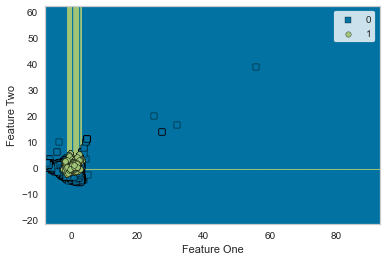

In [59]:
plot_model(model, plot = 'boundary')

In [6]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9966,1.0000,1.0000,0.8456,0.9163,0.9146,0.9180
1,0.9953,0.9999,1.0000,0.7986,0.8880,0.8856,0.8915
2,0.9945,0.9999,1.0000,0.7708,0.8706,0.8678,0.8755
3,0.9943,0.9999,1.0000,0.7638,0.8661,0.8632,0.8714
4,0.9948,0.9998,1.0000,0.7817,0.8775,0.8749,0.8818
5,0.9949,0.9999,1.0000,0.7835,0.8786,0.8760,0.8829
6,0.9964,0.9999,1.0000,0.8367,0.9111,0.9092,0.9130
7,0.9947,0.9998,1.0000,0.7780,0.8752,0.8725,0.8797
8,0.9951,0.9999,0.9970,0.7943,0.8842,0.8817,0.8877
9,0.9949,0.9999,1.0000,0.7854,0.8798,0.8772,0.8839


In [8]:
model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9984,0.9970,0.9823,0.9896,0.9894,0.9894
1,0.9994,0.9909,0.9820,0.9879,0.9849,0.9847,0.9847
2,0.9993,0.9894,0.9790,0.9849,0.9819,0.9816,0.9816
3,0.9993,0.9923,0.9850,0.9762,0.9806,0.9802,0.9802
4,0.9993,0.9924,0.9850,0.9791,0.9820,0.9817,0.9817
5,0.9996,0.9939,0.9880,0.9880,0.9880,0.9878,0.9878
6,0.9998,0.9984,0.9970,0.9940,0.9955,0.9954,0.9954
7,0.9993,0.9923,0.9850,0.9762,0.9806,0.9802,0.9802
8,0.9993,0.9893,0.9790,0.9849,0.9819,0.9816,0.9816
9,0.9994,0.9923,0.9850,0.9850,0.9850,0.9847,0.9847


In [9]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 378)

# Full Data

In [16]:
df_f = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/full_data.csv', sep=';')
display(df_f.head())
print(df_f.shape)
print(df_f.columns)

,Data_Hora,LocalMax_d_All,LocalMax_d_ow,Local_d_Null,LocalMax_h_All,LocalMax_h_ow,Local_h_Null,Local,UmidadeRelativa,PressaoAtmosferica,...,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_d,LocalMax_h,Local_d,Local_h
0,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,RM,86.6,926.7,...,23.3,17.8,0.0,131.0,2.5,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Erasmo,88.8,920.5,...,22.9,17.7,0.0,133.0,0.7,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Camilopolis,84.8,920.6,...,22.8,17.5,0.0,137.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Paraiso,92.3,919.1,...,22.7,18.0,0.0,101.0,2.6,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1464030, 21)
Index(['Data_Hora', 'LocalMax_d_All', 'LocalMax_d_ow', 'Local_d_Null',
       'LocalMax_h_All', 'LocalMax_h_ow', 'Local_h_Null', 'Local',
       'UmidadeRelativa', 'PressaoAtmosferica', 'TemperaturaDoAr',
       'TemperaturaInterna', 'PontoDeOrvalho', 'RadiacaoSolar',
       'DirecaoDoVento', 'VelocidadeDoVento', 'Precipitacao', 'LocalMax_d',
       'LocalMax_h', 'Local_d', 'Local_h'],
      dtype='object')


In [17]:
df_f = df_f.drop(columns = ['LocalMax_d_All', 'LocalMax_d_ow', 'Local_d_Null', 'LocalMax_h_ow', 'Local_h_Null', 'LocalMax_d', 'Local_d', 'Local_h'])
df_f['Data_Hora'] = pd.to_datetime(df_f['Data_Hora'], yearfirst=True)
df_f['Data'] = df_f['Data_Hora'].dt.strftime('%Y-%m-%d')
df_f['Mes'] = df_f['Data_Hora'].dt.month
df_f['Dia'] = df_f['Data_Hora'].dt.day
df_f = df_f[df_f['Data_Hora'].dt.minute == 0]

## PrecSum

In [18]:
df_prec_sum = df_f.groupby(['Data', 'Local']).sum().reset_index()[['Data', 'Local', 'Precipitacao']]
df_prec_sum.columns = ['Data', 'Local', 'PrecSum']
df_f = df_f.merge(df_prec_sum, on=['Data', 'Local'])
df_f.head(10)

,Data_Hora,LocalMax_h_All,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_h,Data,Mes,Dia,PrecSum
0,2011-01-01 00:00:00,0.0,RM,86.6,926.7,20.1,23.3,17.8,0.0,131.0,2.5,0.0,0.0,2011-01-01,1,1,0.8
1,2011-01-01 01:00:00,0.0,RM,85.5,925.9,20.1,23.4,17.6,0.0,166.0,4.2,0.0,0.0,2011-01-01,1,1,0.8
2,2011-01-01 02:00:00,0.0,RM,87.1,925.2,19.9,23.2,17.7,0.0,143.0,1.4,0.0,0.0,2011-01-01,1,1,0.8
3,2011-01-01 03:00:00,0.0,RM,87.7,924.7,19.7,23.0,17.6,0.0,155.0,0.9,0.0,0.0,2011-01-01,1,1,0.8
4,2011-01-01 04:00:00,0.0,RM,86.4,924.5,19.6,22.8,17.3,0.0,146.0,2.7,0.0,0.0,2011-01-01,1,1,0.8
5,2011-01-01 05:00:00,0.0,RM,86.1,924.6,19.8,23.1,17.4,0.0,172.0,2.8,0.0,0.0,2011-01-01,1,1,0.8
6,2011-01-01 06:00:00,0.0,RM,86.0,924.6,19.8,23.1,17.4,0.0,140.0,0.9,0.0,0.0,2011-01-01,1,1,0.8
7,2011-01-01 07:00:00,0.0,RM,85.6,924.8,19.9,23.3,17.4,30.0,181.0,1.7,0.0,0.0,2011-01-01,1,1,0.8
8,2011-01-01 08:00:00,0.0,RM,77.2,924.9,20.5,23.6,16.7,238.0,122.0,4.1,0.0,0.0,2011-01-01,1,1,0.8
9,2011-01-01 09:00:00,0.0,RM,73.3,925.3,21.0,25.0,16.1,346.0,154.0,3.6,0.0,0.0,2011-01-01,1,1,0.8


In [19]:
label_name = 'LocalMax_h_All'

df_f.loc[(df_f[label_name] == 1) & (df_f['PrecSum'] <= 10), label_name] = 0
df_f.groupby(label_name).count()

,Data_Hora,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_h,Data,Mes,Dia,PrecSum
LocalMax_h_All,,,,,,,,,,,,,,,,
0.0,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410,364410
1.0,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615


## Upsampling

In [22]:
x = df_f[[c for c in df_f.columns if label_name not in c]]
y = df_f[label_name]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 378)

X = pd.concat([x_treino, y_treino], axis=1)

# separate minority and majority classes
not_label = X[X[label_name]==0].copy()
label = X[X[label_name]==1].copy()

# upsample minority
upsampled = resample(label,
                        replace=True, # sample with replacement
                        n_samples=len(not_label), # match number in majority class
                        random_state=378) # reproducible results

# combine majority and upsampled minority
df_f_upsampled = pd.concat([not_label, upsampled])

x_treino = df_f_upsampled[[c for c in df_f.columns if label_name not in c]]
y_treino = df_f_upsampled[label_name]

df_f_upsampled = pd.concat([x_treino, y_treino], axis=1)

display(y_treino.value_counts())

1.0    255122
0.0    255122
Name: LocalMax_h_All, dtype: int64

## PyCaret: Setup

In [23]:
df_f_upsampled = df_f.copy()

In [24]:
df_f_upsampled = df_f_upsampled.drop(columns = ['Data_Hora', 'Data', 'LocalMax_h'])

In [25]:
df_f_upsampled[label_name] = df_f_upsampled[label_name].astype(int)

In [26]:
clf_f = setup(df_f_upsampled, target = label_name, session_id=42, log_experiment=True, experiment_name='clf_f', fix_imbalance = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(366025, 14)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Obter melhor modelo

In [27]:
best_model_f = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9969,0.9842,0.4311,0.7660,0.5504,0.5490,0.5726,10.6464
1,Extreme Gradient Boosting,0.9966,0.9939,0.5980,0.6200,0.6082,0.6065,0.6069,10.2993
2,Random Forest Classifier,0.9964,0.9442,0.3831,0.6504,0.4814,0.4797,0.4971,1.6874
3,CatBoost Classifier,0.9961,0.9934,0.6271,0.5462,0.5836,0.5816,0.5832,43.5564
4,Decision Tree Classifier,0.9948,0.7494,0.5019,0.4244,0.4594,0.4568,0.4587,6.8486
5,Light Gradient Boosting Machine,0.9948,0.9931,0.6587,0.4451,0.5301,0.5276,0.5384,1.3331
6,Gradient Boosting Classifier,0.9807,0.9879,0.8281,0.1645,0.2744,0.2690,0.3640,125.8438
7,K Neighbors Classifier,0.9783,0.8439,0.6182,0.1201,0.2010,0.1951,0.2660,11.3974
8,Ada Boost Classifier,0.9759,0.9852,0.8015,0.1322,0.2270,0.2211,0.3196,28.0816
9,Logistic Regression,0.9446,0.9776,0.9267,0.0691,0.1287,0.1215,0.2448,3.0874


In [12]:
best_model_f

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [30]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9959,0.9929,0.5500,0.5432,0.5466,0.5445,0.5446
1,0.9967,0.9924,0.6203,0.6203,0.6203,0.6186,0.6186
2,0.9967,0.9937,0.6582,0.6118,0.6341,0.6325,0.6329
3,0.9967,0.9948,0.6076,0.6316,0.6194,0.6177,0.6178
4,0.9963,0.9958,0.5696,0.5769,0.5732,0.5714,0.5714
5,0.9963,0.9942,0.5570,0.5867,0.5714,0.5696,0.5698
6,0.9962,0.9931,0.5823,0.5679,0.5750,0.5731,0.5731
7,0.9972,0.9940,0.6203,0.7000,0.6577,0.6563,0.6575
8,0.9968,0.9919,0.5823,0.6479,0.6133,0.6117,0.6126
9,0.9973,0.9967,0.6329,0.7143,0.6711,0.6698,0.6710


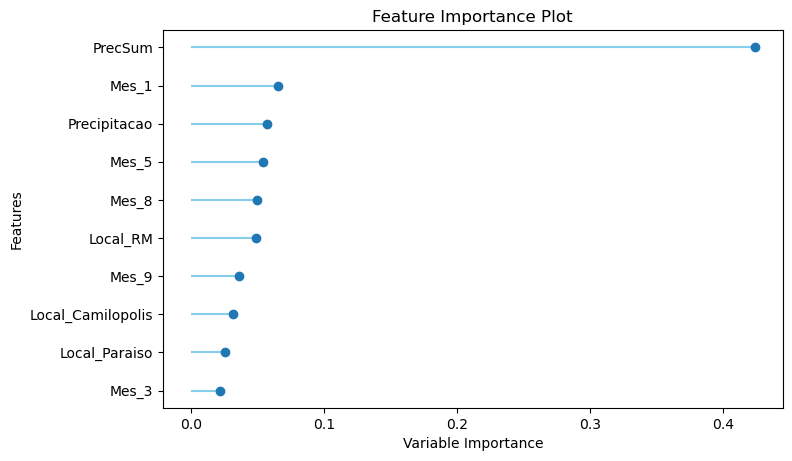

In [32]:
plot_model(model, 'feature')

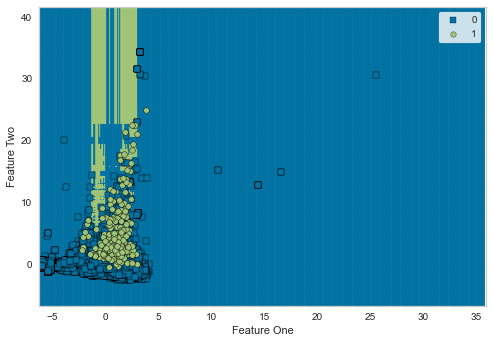

In [33]:
plot_model(model, 'boundary')

## Testar com ExtraTreesClassifier

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [34]:
df_f_train = df_f.copy()
df_f_train['Local'] = df_f_train['Local'].replace({'Camilopolis': 1, 'Erasmo': 2, 'Paraiso': 3, 'RM': 4, 'Vitoria': 5})
df_f_train = df_f_train.merge(pd.get_dummies(df_f_train[['Mes', 'Local']], columns = ['Mes', 'Local'], prefix = ['Mes', 'Local']), left_index=True, right_index=True)

In [35]:
cols_rem = ['LocalMax_h', 'LocalMax_h_All', 'Data_Hora', 'Data'] + ['Mes', 'Local']
label_name = 'LocalMax_h'

x = df_f_train[[c for c in df_f_train.columns if c not in cols_rem]]
y = df_f_train[label_name]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 378)

X = pd.concat([x_treino, y_treino], axis=1)

# separate minority and majority classes
not_ordem = X[X[label_name]==0].copy()
ordem = X[X[label_name]==1].copy()

# upsample minority
ordem_upsampled = resample(ordem,
                        replace=True, # sample with replacement
                        n_samples=len(not_ordem), # match number in majority class
                        random_state=378) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_ordem, ordem_upsampled])

x_treino = upsampled[[c for c in df_f_train.columns if c not in cols_rem]]
y_treino = upsampled[label_name]

display(y_treino.value_counts())

1.0    255553
0.0    255553
Name: LocalMax_h, dtype: int64

In [41]:
model_f = ExtraTreesClassifier(random_state=42)

model_f.fit(x_treino, y_treino)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [42]:
y_teste_pred = model_f.predict(x_teste)
y_treino_pred = model_f.predict(x_treino)

print(f"Treino: {accuracy_score(y_treino, y_treino_pred)}")
print(f"Teste: {accuracy_score(y_teste, y_teste_pred)}")
print(f"Precisão: {precision_score(y_teste, y_teste_pred)}")
print(f"Recall: {recall_score(y_teste, y_teste_pred)}")
print(f"F1: {f1_score(y_teste, y_teste_pred)}")
display(confusion_matrix(y_teste, y_teste_pred, normalize='true'))
display(confusion_matrix(y_teste, y_teste_pred,))

Treino: 1.0
Teste: 0.9979418621594055
Precisão: 0.945054945054945
Recall: 0.28013029315960913
F1: 0.4321608040201006


array([[9.99954338e-01, 4.56616835e-05],
       [7.19869707e-01, 2.80130293e-01]])

array([[109496,      5],
       [   221,     86]], dtype=int64)

In [89]:
best_model_f.

array([0.10109665, 0.01591399, 0.04059821, 0.02595962, 0.02113906,
       0.03336398, 0.01279464, 0.00954996, 0.32205636, 0.0272932 ,
       0.20769373, 0.00474031, 0.0046346 , 0.00535639, 0.00402852,
       0.00541425, 0.0143778 , 0.00504018, 0.00359989, 0.00527834,
       0.02971167, 0.0104618 , 0.00483454, 0.03158834, 0.00442103,
       0.00552541, 0.02303112, 0.02049638])

In [91]:
x_treino

,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,Mes,Dia,PrecSum
283474,3,62.700000,930.700000,15.600000,18.600000,8.400000,380.0,158.0,8.300000,0.0,8,6,0.2
39219,3,87.600000,921.000000,18.700000,22.400000,16.700000,0.0,103.0,4.300000,0.0,11,28,0.0
361666,4,65.300000,931.200000,12.900000,16.800000,7.300000,171.0,245.0,11.371716,0.0,5,25,0.6
183598,3,103.752960,922.600000,18.600000,22.800000,18.817616,0.0,143.0,1.800000,0.2,4,22,14.7
74502,5,25.200000,922.948303,30.996756,33.263191,9.558246,669.0,0.0,0.000000,0.0,9,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259329,1,92.900000,919.900000,19.400000,22.500000,18.200000,0.0,270.0,6.500000,26.8,1,17,39.0
214817,1,86.093430,919.156616,22.315697,25.563660,19.332394,2.0,329.0,8.426270,7.6,1,9,62.8
169207,5,100.113892,923.500000,20.700000,24.000000,20.700000,0.0,340.0,4.000000,14.7,12,22,64.9
313236,2,94.300000,929.900000,18.500000,21.500000,17.600000,0.0,169.0,11.000000,2.0,4,15,17.0


In [92]:
df_f_upsampled

,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_h,Mes,Dia,PrecSum
0,RM,86.600000,926.7,20.1,23.300000,17.8,0.0,131.0,2.5,0.0,0,1,1,0.8
1,RM,85.500000,925.9,20.1,23.400000,17.6,0.0,166.0,4.2,0.0,0,1,1,0.8
2,RM,87.100000,925.2,19.9,23.200000,17.7,0.0,143.0,1.4,0.0,0,1,1,0.8
3,RM,87.700000,924.7,19.7,23.000000,17.6,0.0,155.0,0.9,0.0,0,1,1,0.8
4,RM,86.400000,924.5,19.6,22.800000,17.3,0.0,146.0,2.7,0.0,0,1,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93615,Vitoria,91.718369,922.4,19.6,22.935221,18.3,0.0,285.0,1.8,3.8,1,2,26,55.3
178029,Vitoria,103.412842,921.4,19.5,22.800000,20.1,0.0,98.0,2.5,2.0,1,3,7,49.5
313214,Camilopolis,93.400000,928.2,18.0,20.400000,17.0,0.0,20.0,21.2,2.4,1,4,15,23.6
87775,Vitoria,91.000000,920.6,20.2,25.200000,18.6,5.0,30.0,6.1,41.4,1,1,8,54.0


In [15]:
df_f[(df_f['PressaoAtmosferica'] == 0)]

,Data_Hora,LocalMax_d_All,LocalMax_d_ow,Local_d_Null,LocalMax_h_All,LocalMax_h_ow,Local_h_Null,Local,UmidadeRelativa,PressaoAtmosferica,...,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_d,LocalMax_h,Local_d,Local_h
4,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393718,2019-02-04 10:15:00,1.0,1.0,0.0,1.0,0.0,0.0,RM,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1393723,2019-02-04 10:30:00,1.0,1.0,0.0,1.0,0.0,0.0,RM,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1393729,2019-02-04 10:45:00,1.0,1.0,0.0,1.0,0.0,0.0,RM,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1393734,2019-02-04 11:00:00,1.0,1.0,0.0,1.0,0.0,0.0,RM,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
